In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_csv('/Users/vaishakhmenon/Downloads/archive (5)/fashion-mnist_train.csv') 
test_data = pd.read_csv('/Users/vaishakhmenon/Downloads/archive (5)/fashion-mnist_test.csv')


In [12]:
#Step 2 - Preprocess data: Separate features and labels for training and test datasets
x_train = train_data.drop('label', axis=1).values  # Drop the 'label' column to get features
y_train = train_data['label'].values  # Extract the 'label' column as the target
x_test = test_data.drop('label', axis=1).values  # Same for the test set
y_test = test_data['label'].values  # Same for the test set


In [13]:
#Step 2 - Preprocess data: Reshape the data to fit the model input requirements (28x28 pixels with 1 color channel)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values to be between 0 and 1
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values to be between 0 and 1


In [14]:
#Step 3: Build the model using the Sequential API
model = Sequential([
    Input(shape=(28, 28, 1)),  # Define the input shape to be 28x28 pixels with 1 color channel
    Conv2D(32, (3, 3), activation='relu'),  # First convolutional layer with 32 filters and 3x3 kernel size
    MaxPooling2D((2, 2)),  # First max pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer with 64 filters and 3x3 kernel size
    MaxPooling2D((2, 2)),  # Second max pooling layer with 2x2 pool size
    Flatten(),  # Flatten the output from the convolutional layers to feed into the dense layers
    Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units (one for each class) and softmax activation
])


In [15]:
# Compile the model
model.compile(optimizer='adam',  # Use Adam optimizer
              loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy loss
              metrics=['accuracy'])  # Track accuracy during training

In [16]:
#Step 5: Train the model and save the history
history = model.fit(x_train, y_train,  # Training data and labels
                    epochs=10,  # Number of epochs to train for
                    validation_data=(x_test, y_test))  # Validation data and labels to monitor during training

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7824 - loss: 0.6081 - val_accuracy: 0.8863 - val_loss: 0.3150
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8889 - loss: 0.3049 - val_accuracy: 0.8896 - val_loss: 0.3080
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9033 - loss: 0.2591 - val_accuracy: 0.9082 - val_loss: 0.2496
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9163 - loss: 0.2234 - val_accuracy: 0.9024 - val_loss: 0.2623
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9284 - loss: 0.1944 - val_accuracy: 0.9179 - val_loss: 0.2253
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9364 - loss: 0.1703 - val_accuracy: 0.9178 - val_loss: 0.2288
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9477 - loss: 0.1425 - val_accuracy: 0.9129 - val_loss: 0.2516
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9516 - loss: 0

In [17]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')  # Print the test accuracy


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9125 - loss: 0.2819
Test accuracy: 0.9175999760627747


In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
#The model shows a consistent increase in training accuracy, reaching around 96.07% by the 10th epoch. The training loss consistently decreases, indicating that the model is effectively learning from the training data.
#The validation accuracy improves and stabilizes around 92.13% by the 10th epoch. The validation loss decreases initially but starts to fluctuate slightly and increases towards the later epochs, suggesting potential overfitting.
#The final test accuracy of approximately 92.13% is consistent with the validation accuracy, indicating that the model generalises well to unseen data.

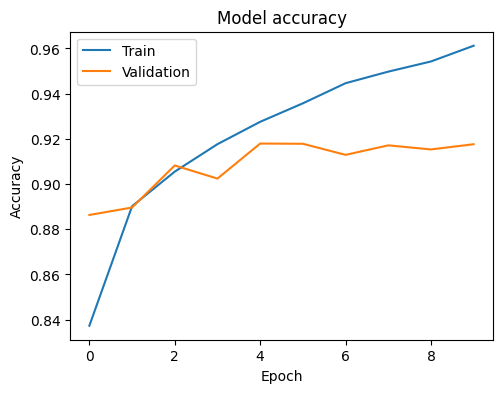

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

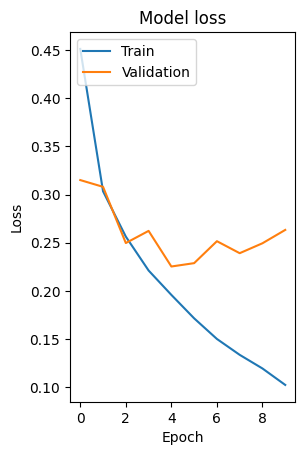

In [20]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
#Both training and validation accuracy curves show an upward trend, which is a positive sign that the model is learning. The training accuracy continues to rise more sharply than the validation accuracy, suggesting that the model may be slightly overfitting to the training data.
#Training loss decreases steadily, which is expected as the model learns. Validation loss decreases initially but starts to fluctuate and slightly increase after a few epochs. This indicates potential overfitting, as the model's performance on the validation set does not improve proportionally with the training set.


In [21]:
# Make predictions on the test data
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [22]:
# Display some sample predictions along with the actual labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [23]:
# Function to plot images along with predictions and true labels
def plot_sample_predictions(images, predictions, true_labels, class_names, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[true_labels[i]]}")
        plt.axis('off')
    plt.show()


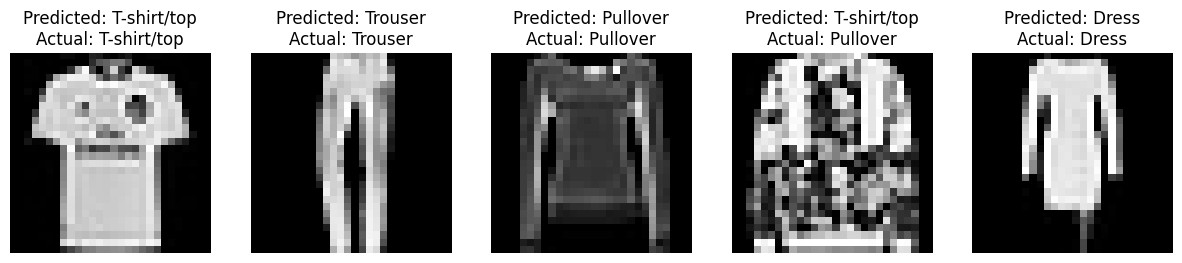

In [24]:
# Plot 5 sample predictions
plot_sample_predictions(x_test, predictions, y_test, class_names, num_samples=5)